# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Gian Marco Paldino - __[gian.marco.paldino@ulb.be](mailto:gian.marco.paldino@ulb.be)__
### Cédric Simar - __[cedric.simar@ulb.be](mailto:cedric.simar@ulb.be)__

## TP 2 - Linear Models

####  March 2023

#### Materials originally developed by *Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi*

### Estimation using the mean square error

Assume to have $N$ observation pairs $(x_i,y_i)$ generated by the following stochastic process

\begin{equation*}
 y_i=\beta_0+\beta_1 x_i +w_i,
\end{equation*}

where the $w_i$ are iid realisations of a random variable $\mathbf{w}$ with mean zero and constant variance $\sigma^2_{\mathbf{w}}$.

The $x_i$ can be seen as *fixed*, the only random component in the sample set $D_N$ is therefore contained in the $y_i$ (which are random due to the $w_i$).

The coefficients $\beta_0$ and $\beta_1$ can be estimated using the least squares method. This method consists of taking those estimators $\hat{\beta_0}$ and $\hat{\beta_1}$ which minimize

\begin{equation}
 R_{emp}=\sum_{i=1}^N (y_i-\hat{y_i})^2
\end{equation}

where 

\begin{equation}
 \hat{y_i}=\hat{\beta_0}+\hat{\beta_1} x_i.
\end{equation}

This is equivalent to 

\begin{equation}
 \{\hat{\beta_0},\hat{\beta_1}\}=\arg\min_{b_0,b_1}\sum_{i=1}^N (y_i-b_0-b_1x_i)^2.
\end{equation}

The solution is given by *(Eq. 1)*

\begin{equation}
 \hat{\beta_1}=\frac{S_{xy}}{S_{xx}},\quad \hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x},  
\end{equation}

where *(Eq. 2)*

\begin{equation}
 \bar{x}=\frac{\sum_{i=1}^Nx_i}{N},\quad\bar{y}=\frac{\sum_{i=1}^Ny_i}{N},\quad S_{xy}=\sum_{i=1}^N (x_i-\bar{x})y_i,\quad S_{xx}=\sum_{i=1}^N(x_i-\bar{x})^2.
\end{equation}

### Properties of the estimator

* $E_{D_N}[\hat{\beta_1}]=\beta_1$
* $Var[\hat{\beta_1}]=\frac{\sigma^2}{S_{xx}}$
* $E[\hat{\beta_0}]=\beta_0$
* $Var[\hat{\beta_0}]=\sigma^2\left( \frac{1}{N}+\frac{\bar{x}^2}{S_{xx}}\right)$
* $\hat{\sigma}^2_{\mathbf{w}}=\frac{\sum_{i=1}^N(y_i-\hat{y_i})^2}{N-2}$ is a non-biased estimator of $\sigma^2_{\mathbf{w}}$.


### Partitioning the variability

The variability of the response $y_i$ can be expressed as follows

\begin{equation}
 \sum_{i=1}^N(y_i-\bar{y})^2=\sum_{i=1}^N(\hat{y_i}-\bar{y})^2+\sum_{i=1}^N(y_i-\hat{y_i})^2,
\end{equation}

that is

\begin{equation}
 SS_{tot}=SS_{mod}+SS_{res}.
\end{equation}

### The F-test

Goal: test if the variable $y$ is really influenced by the variable $x$. This can be formulated as a hypothesis test $\beta_1=0$. If the test is rejected, it can be deduced that $x$ influences $y$ significantly.

It can be shown that given a normally distributed $\mathbf{w}$: *(Eq. 3)*

\begin{equation}
 \frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2}
\end{equation}

if the hypothesis $\beta_1=0$ is true.

### The t-test

It can be shown that given a normally distributed $\mathbf{w}$:

\begin{equation}
 \hat{\beta_1}\sim \mathcal{N}(\beta_1,\sigma^2 / S_{xx})
\end{equation}

and

\begin{equation}
 \frac{\hat{\beta_1}-\beta_1}{\hat{\sigma}}\sqrt{S_{xx}} \sim \mathcal{T}_{N-2}.
\end{equation}

This can be used for testing the following hypothesis: $\hat{\beta_1}=\beta_1$.

### Confidence intervals

With a probability $1-\alpha$, the true parameter $\beta_1$ lies in the interval *(Eq. 4)*

\begin{equation}
 \hat{\beta_1}\pm t_{\alpha/2,N-2}\cdot \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}.
\end{equation}

### Variance of the response

Let

\begin{equation}
 \hat{\mathbf{y}}(x)=\hat{\beta_0}+\hat{\beta_1} x.
\end{equation}

We can show that for all $x$:

\begin{equation}
 E_{D_N}[ \hat{\mathbf{y}}(x)]=E_{[y]}[ {\mathbf{y}}(x)]
\end{equation}

and

\begin{equation}
 Var[ \hat{\mathbf{y}}(x)]=\sigma^2\left[\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right].
\end{equation}



### Imports and setup

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f, t, norm

``statsmodels`` is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and data exploration. It is built on top of numpy, scipy, and pandas, and is designed to complement scikit-learn for statistical modeling.

In [40]:
import statsmodels.api as sm

The `thuesen` dataset deals with blood glucose and short.velocity. Here we create a small DataFrame similar to the original data:

In [41]:
thuesen_data = pd.DataFrame({
    'blood.glucose': [15.3, 10.8, 8.1, 19.5, 7.2, 5.3, 9.3, 11.1, 7.5, 12.2, 
                      6.7, 5.2, 19.0, 15.1, 6.7, 8.6, 4.2, 10.3, 12.5,16.1,
                      13.3, 4.9, 8.8, 9.5],
    'short.velocity': [1.76, 1.34,1.27,1.47,1.27,1.49,1.31,1.09,1.18,1.22,
                       1.25,1.19,1.95,1.28,1.52, np.nan,1.12,1.37,1.19,1.05,
                       1.32,1.03,1.12,1.70]
})
thuesen_data.head()

,blood.glucose,short.velocity
0,15.3,1.76
1,10.8,1.34
2,8.1,1.27
3,19.5,1.47
4,7.2,1.27


---

## Linear Regression Exercises

### Exercise 1

We focus on the relationship between `short.velocity` (Y) and `blood.glucose` (X).

**Data cleaning:**

In [42]:
df = thuesen_data.dropna(subset=['short.velocity'])
Y = df['short.velocity'].values
X = df['blood.glucose'].values
N = len(X)

**Compute coefficients by hand (Ordinary Least Squares):**

Recall:
$$
\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}},\quad \hat{\beta}_0 = \bar{y} - \hat{\beta}_1\bar{x}
$$

In [43]:
X_bar = X.mean()
Y_bar = Y.mean()
S_xx = np.sum((X - X_bar)**2)
S_xy = np.sum((X - X_bar)*Y)

b1_hat = S_xy / S_xx
b0_hat = Y_bar - b1_hat * X_bar

print("beta_0:", b0_hat)
print("beta_1:", b1_hat)

beta_0: 1.097814877772383
beta_1: 0.021962522259996637


**F-test and T-test:**

Under H0: $$\beta_1 = 0$$,
We have:
$$
F = \frac{SS_{mod}}{SS_{res}/(N-2)} \sim F_{1,N-2}
$$

Compute `SS_mod`, `SS_res`:

In [44]:
Y_hat = b0_hat + b1_hat*X
SS_mod = np.sum((Y_hat - Y_bar)**2)
SS_res = np.sum((Y - Y_hat)**2)
F_stat = SS_mod / (SS_res / (N-2))
F_pval = 1 - f.cdf(F_stat, 1, N-2)

print("F-statistic:", F_stat)
print("F-test p-value:", F_pval)

F-statistic: 4.414018433146217
F-test p-value: 0.04789591090757217


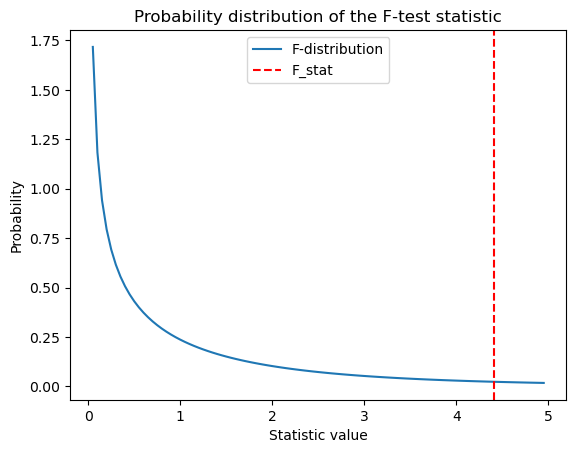

In [45]:
import matplotlib.pyplot as plt
from scipy.stats import f

I = np.arange(0, 5, 0.05)
plt.plot(I, f.pdf(I, dfn=1, dfd=N-2), label='F-distribution')
plt.xlabel('Statistic value')
plt.ylabel('Probability')
plt.title('Probability distribution of the F-test statistic')
plt.axvline(x=F_stat, color='red', linestyle='--', label='F_stat')
plt.legend()
plt.show()

**T-test:**

- **Hypothesis**: $\hat{\beta}_1=\beta_1=0$
- **Test statistic**: $\frac{\hat{\beta_1}-\beta_1}{\hat{\sigma}}\sqrt{S_{xx}} \sim \mathcal{T}_{N-2}$


Where $\hat{\sigma}^2 = \sum (y_i - \hat{y}_i)^2/(N-2)$:

In [46]:
b1 = 0 # By hypothesis
sigma_hat = np.sqrt(SS_res/(N-2))
t_stat = (b1_hat - b1) / (sigma_hat/np.sqrt(S_xx))
t_pval = 2*(1 - t.cdf(abs(t_stat), N-2))  # two-tailed

print("t-statistic:", t_stat)
print("T-test p-value:", t_pval)

t-statistic: 2.100956551941572
T-test p-value: 0.04789591090757206


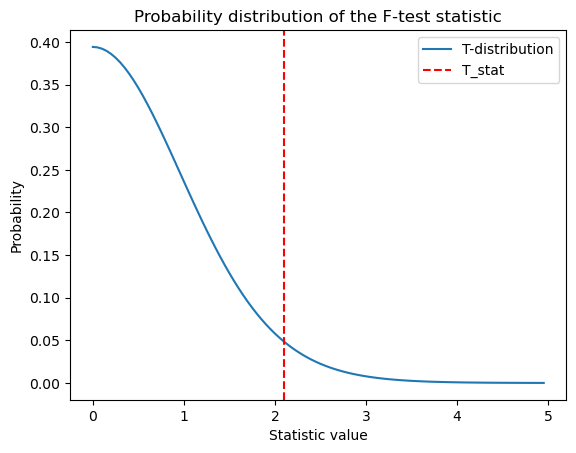

In [47]:
import matplotlib.pyplot as plt
from scipy.stats import t

I = np.arange(0, 5, 0.05)
plt.plot(I, t.pdf(I, df=N-2), label='T-distribution')
plt.xlabel('Statistic value')
plt.ylabel('Probability')
plt.title('Probability distribution of the F-test statistic')
plt.axvline(x=t_stat, color='red', linestyle='--', label='T_stat')
plt.legend()
plt.show()

*  Compute the confidence interval for $\beta_1$ using equation (Eq. 4) and the quantiles function.

### Confidence interval

With a probability $1-\alpha$, the true parameter $\beta_1$ lies in the interval *(Eq. 4)*

\begin{equation}
 \hat{\beta_1}\pm t_{\alpha/2,N-2}\cdot \sqrt{\frac{\hat{\sigma}^2}{S_{xx}}}.
\end{equation}

In [48]:
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, N-2)
conf_bound = t_crit * (sigma_hat / np.sqrt(S_xx))
ci_lower = b1_hat - conf_bound
ci_upper = b1_hat + conf_bound

print("95% CI for beta_1: [", ci_lower, ",", ci_upper, "]")

95% CI for beta_1: [ 0.00022310774672655923 , 0.04370193677326671 ]


**Compare with `statsmodels` linear regression results:**

In [49]:
X_with_const = sm.add_constant(X)  # add intercept
model = sm.OLS(Y, X_with_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.414
Date:                Thu, 12 Dec 2024   Prob (F-statistic):             0.0479
Time:                        14:49:22   Log-Likelihood:                 3.5836
No. Observations:                  23   AIC:                            -3.167
Df Residuals:                      21   BIC:                           -0.8962
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0978      0.117      9.345      0.0

**Visualize data and regression line:**

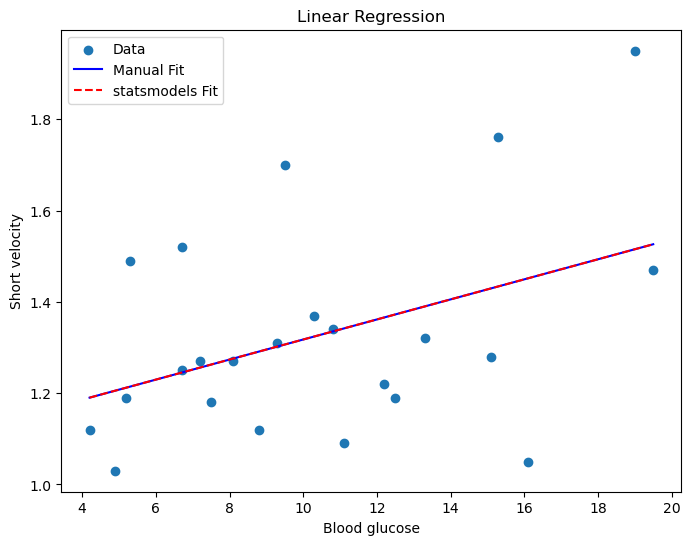

In [50]:
x_grid = np.linspace(X.min(), X.max(), 100)
y_grid = b0_hat + b1_hat*x_grid

plt.figure(figsize=(8,6))
plt.scatter(X, Y, label='Data')
plt.plot(x_grid, y_grid, color='blue', label='Manual Fit')
plt.plot(x_grid, model.params[0] + model.params[1]*x_grid, color='red', linestyle='--', label='statsmodels Fit')
plt.xlabel("Blood glucose")
plt.ylabel("Short velocity")
plt.title("Linear Regression")
plt.legend()
plt.show()

---
### Exercise 2

The goal of this exercise is to experimentally study the bias and the variance of $\hat{\beta_0}$, $\hat{\beta_1}$, $\hat{\sigma}$ and $\hat{\mathbf{y}}(x_i)$. See also the theoretical part of this course (slide 24 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1257537/mod_resource/content/4/linregr.pdf)). 


In [51]:
np.random.seed(123)
X = np.arange(-10,11,1)  # from -10 to 10 by 1
beta0 = -1
beta1 = 1
sd_w = 5
N = len(X)
R = 100  # number of repetitions

In [52]:
beta_hat_1_vals = np.zeros(R)
beta_hat_0_vals = np.zeros(R)
sigma_hat_w_vals = np.zeros(R)
Y_hat_all = np.zeros((R,N))
Y_all = np.zeros((R,N))

In [53]:
X_bar = X.mean()
S_xx = np.sum((X - X_bar)**2)

for i in range(R):
    Y_sim = beta0 + beta1*X + np.random.normal(0, sd_w, N)
    Y_all[i,:] = Y_sim
    Y_bar = Y_sim.mean()
    S_xy = np.sum((X - X_bar)*Y_sim)
    b1 = S_xy/S_xx
    b0 = Y_bar - b1*X_bar
    beta_hat_1_vals[i] = b1
    beta_hat_0_vals[i] = b0

    Y_hat_i = b0 + b1*X
    Y_hat_all[i,:] = Y_hat_i
    # sigma estimate
    sigma_hat_w_vals[i] = np.sqrt(np.sum((Y_sim - Y_hat_i)**2)/(N-2))


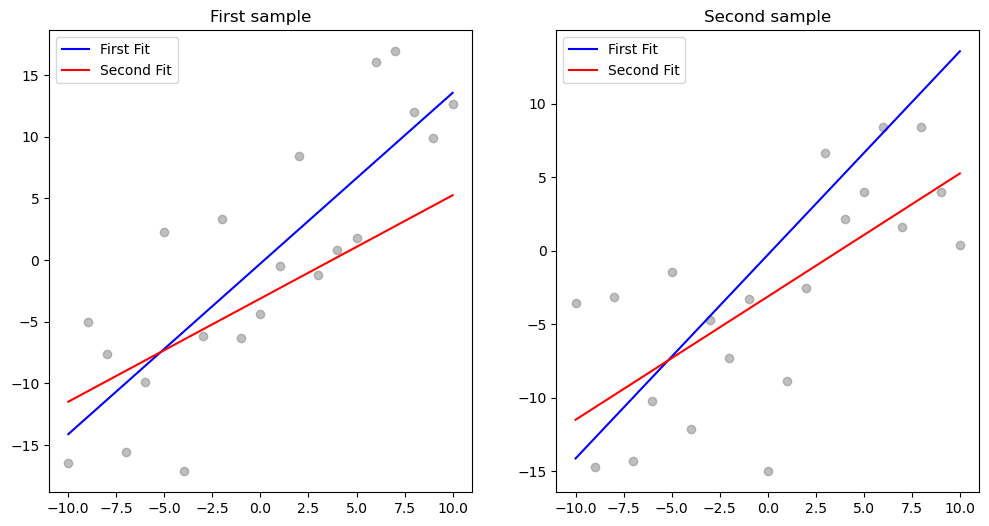

In [54]:
# Plotting
plt.figure(figsize=(12, 6))

# First sample
plt.subplot(1, 2, 1)
plt.scatter(X, Y_all[0, :], color='gray', alpha=0.5)  # Assuming Y_sim as Y_hat_all for visualization
plt.plot(X, Y_hat_all[0, :], color='blue', label='First Fit')
plt.plot(X, Y_hat_all[1, :], color='red', label='Second Fit')
plt.title("First sample")
plt.legend()

# Second sample
plt.subplot(1, 2, 2)
plt.scatter(X, Y_all[1, :], color='gray', alpha=0.5)  # Assuming Y_sim as Y_hat_all for visualization
plt.plot(X, Y_hat_all[0, :], color='blue', label='First Fit')
plt.plot(X, Y_hat_all[1, :], color='red', label='Second Fit')
plt.title("Second sample")
plt.legend()

plt.show()

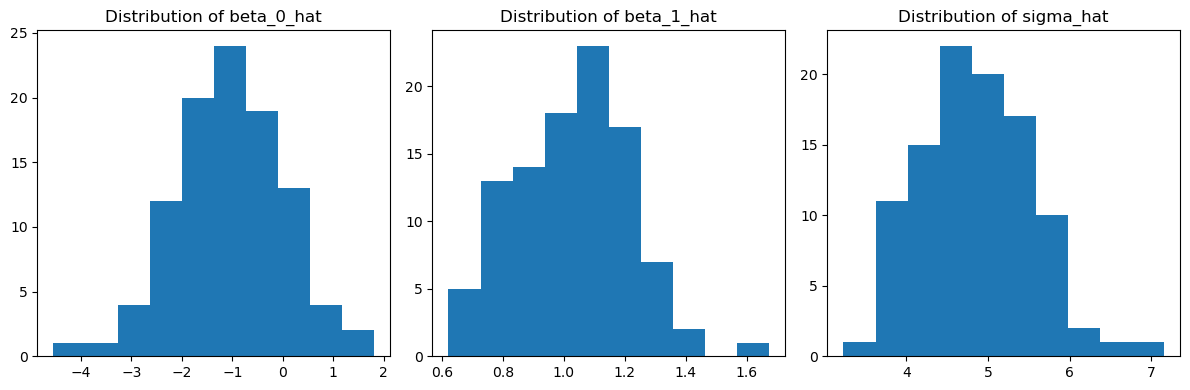

In [55]:
# Histograms
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.hist(beta_hat_0_vals, bins=10)
plt.title("Distribution of beta_0_hat")

plt.subplot(1,3,2)
plt.hist(beta_hat_1_vals, bins=10)
plt.title("Distribution of beta_1_hat")

plt.subplot(1,3,3)
plt.hist(sigma_hat_w_vals, bins=10)
plt.title("Distribution of sigma_hat")

plt.tight_layout()
plt.show()

In [56]:
print("Empirical means:")
print("beta_0_hat mean:", beta_hat_0_vals.mean(), "True:", beta0)
print("beta_1_hat mean:", beta_hat_1_vals.mean(), "True:", beta1)
print("sigma_hat_w mean:", sigma_hat_w_vals.mean(), "True:", sd_w)

Empirical means:
beta_0_hat mean: -1.051702924504729 True: -1
beta_1_hat mean: 1.025787826560985 True: 1
sigma_hat_w mean: 4.8363285001115965 True: 5


* Illustrate the theorem $Var[y(x)]=\sigma^2\left(\frac{1}{N}+\frac{(x-\bar{x})^2}{S_{xx}}\right)$.


In [57]:
for i in range(N):
    var_y_emp = Y_hat_all[:,i].var()
    var_y_theo = sd_w**2 * (1/N + ((X[i]-X_bar)**2)/S_xx)
    print("x=", X[i], "Var[y_hat(x)] emp:", var_y_emp, "theo:", var_y_theo)

x= -10 Var[y_hat(x)] emp: 4.74358698626139 theo: 4.437229437229437
x= -9 Var[y_hat(x)] emp: 4.0607081764817154 theo: 3.82034632034632
x= -8 Var[y_hat(x)] emp: 3.4493632005469057 theo: 3.2683982683982684
x= -7 Var[y_hat(x)] emp: 2.9095520584569625 theo: 2.781385281385281
x= -6 Var[y_hat(x)] emp: 2.441274750211886 theo: 2.3593073593073592
x= -5 Var[y_hat(x)] emp: 2.044531275811673 theo: 2.002164502164502
x= -4 Var[y_hat(x)] emp: 1.7193216352563265 theo: 1.7099567099567101
x= -3 Var[y_hat(x)] emp: 1.4656458285458458 theo: 1.4826839826839828
x= -2 Var[y_hat(x)] emp: 1.2835038556802305 theo: 1.3203463203463204
x= -1 Var[y_hat(x)] emp: 1.1728957166594811 theo: 1.222943722943723
x= 0 Var[y_hat(x)] emp: 1.1338214114835972 theo: 1.1904761904761905
x= 1 Var[y_hat(x)] emp: 1.1662809401525789 theo: 1.222943722943723
x= 2 Var[y_hat(x)] emp: 1.270274302666426 theo: 1.3203463203463204
x= 3 Var[y_hat(x)] emp: 1.445801499025139 theo: 1.4826839826839828
x= 4 Var[y_hat(x)] emp: 1.6928625292287172 theo: 1

---

## Multiple regression exercise

This example is taken from the theoretical part of this course (slide 27 of the chapter [Regression Modelling](https://uv.ulb.ac.be/pluginfile.php/1257537/mod_resource/content/4/linregr.pdf)).

Mutiple linear dependence occurs when the variable $x$ is a vector instead of a scalar. The goal of this exercise is to verify the theoretical results for the estimators $\hat{\mathbf{\sigma}}^2$ and $\hat{\mathbf{\beta} }$ obtained for the least squares method (no bias and analytical results concerning $Var[\hat{\mathbf{\beta}}]$).


In [58]:
np.random.seed(123)
n = 3  # number of input variables (excluding intercept)
p = n+1
beta = np.arange(2, p+2)  # beta = (2,3,4,...)
sd_w = 5

N = 100
X_mat = np.random.uniform(-20,20,(N,n))
X_mat = np.column_stack([np.ones(N), X_mat])  # add intercept
R = 100
beta_hat_mat = np.zeros((p,R))
sigma_hat_w_mult = np.zeros(R)



* Compute $\hat{Y}$, $\hat{\beta}$ and $\hat{\sigma^2}$ following the equations in the course slides 35 and 36.


In [59]:
for i in range(R):
    Y = X_mat @ beta + np.random.normal(0, sd_w, N)
    # OLS estimates:
    # beta_hat = (X'X)^(-1) X' Y
    beta_hat = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ Y
    beta_hat_mat[:,i] = beta_hat
    Y_hat = X_mat @ beta_hat
    e = Y - Y_hat
    sigma_hat_w_mult[i] = np.sqrt((e.T @ e)/(N-p))


In [60]:
beta_hat

array([1.96422915, 3.02493593, 4.03484006, 4.87210496])

* Plot the histograms for $\hat{\sigma}$ and for each $\hat{\beta}$


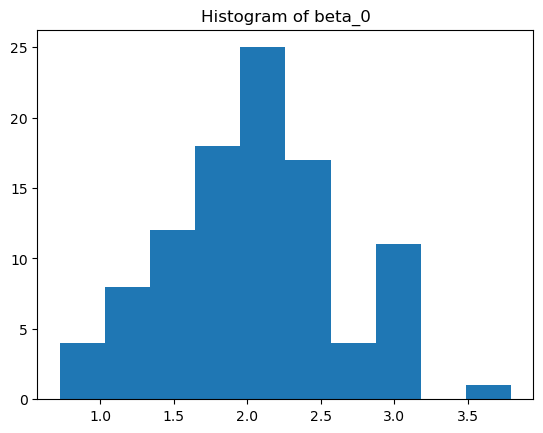

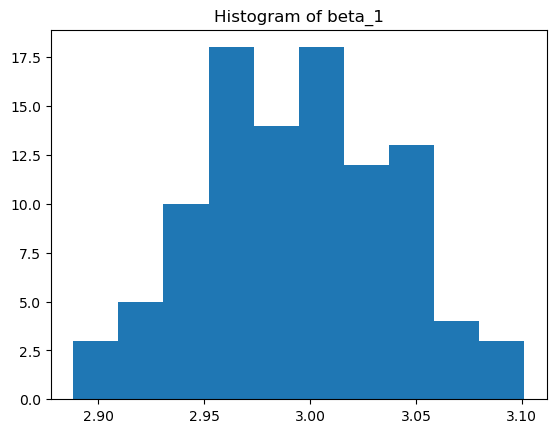

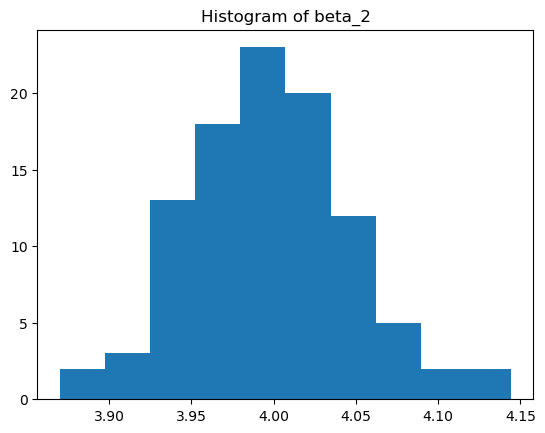

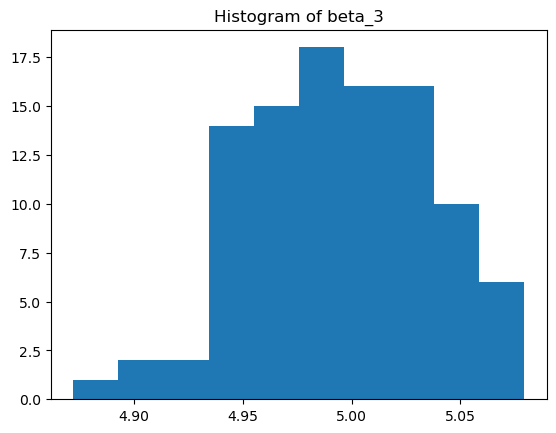

In [61]:
# Plot histograms
for i in range(p):
    plt.hist(beta_hat_mat[i,:], bins=10)
    plt.title(f"Histogram of beta_{i}")
    plt.show()

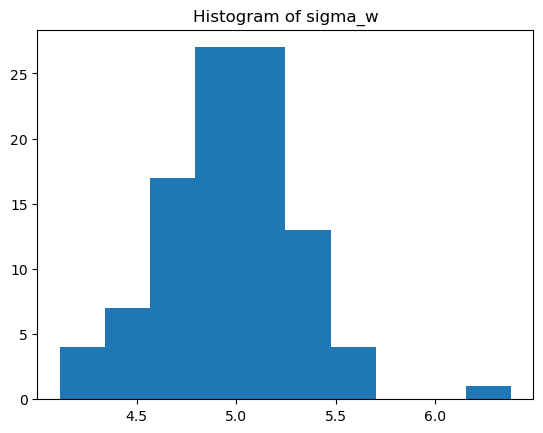

In [62]:
plt.hist(sigma_hat_w_mult, bins=10)
plt.title("Histogram of sigma_w")
plt.show()


In [63]:
print("Empirical means of beta_hat:", beta_hat_mat.mean(axis=1))
print("True beta:", beta)
print("Empirical mean sigma_w:", sigma_hat_w_mult.mean(), "True sigma_w:", sd_w)

Empirical means of beta_hat: [2.04986175 2.99425273 3.998047   4.99468175]
True beta: [2 3 4 5]
Empirical mean sigma_w: 4.963402792243394 True sigma_w: 5
